1. Equation for interior node

    $$
    \frac{u_j^n-u_j^{n-1}}{\Delta t}=\alpha\left(\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta r^2}+\frac1r\frac{u^n_{j+1}-u^n_{j-1}}{2\Delta r}\right)\\
    u_j^{n-1}=-\frac{\alpha\Delta t}{\Delta r}\left(\frac{1}{\Delta r}
    +\frac{1}{2r}\right)u_{j+1}^n
    +\left(\frac{2\alpha\Delta t}{\Delta r^2}+1\right)u_j^n
    -\frac{\alpha\Delta t}{\Delta r}\left(\frac{1}{\Delta r}
    -\frac{1}{2r}\right)u_{j-1}^n
    $$

2. Boundary condition

    Ghost nodes

    $$
    u^n_1 - u^n_{-1} = 0\\
    \alpha\frac{u^n_{r} - u^n_{r-2}}{2\Delta r}+u^n_{r-1} = 0
    $$
    $$
    u^n_{-1} = u^n_1\\
    u^n_{r} = u^n_{r-2}-\frac{2\Delta r}{\alpha}u^n_{r-1}
    $$

    Modified equations for the $0$-th and the $(r-1)$-th points

    $$
    \frac{u_0^n-u_0^{n-1}}{\Delta t}=\alpha\left(\frac{2u_{1}^n-2u_0^n}{\Delta r^2}\right)\\
    \frac{u_{r-1}^n-u_{r-1}^{n-1}}{\Delta t}=\alpha\left(\frac{2u^n_{r-2}-2u_{r-1}^n}{\Delta r^2}-\frac{2u^n_{r-1}}{\alpha\Delta r}-\frac{u^n_{r-1}}{r\alpha}\right)
    $$

    $$
    u_0^{n-1}=-\frac{2\alpha\Delta t}{\Delta r^2}u_{1}^n
    +\left(\frac{2\alpha\Delta t}{\Delta r^2}+1\right)u_0^n\\
    u_{r-1}^{n-1}=-\frac{2\alpha\Delta t}{\Delta r^2}u^n_{r-2}
    +\left(\frac{2\Delta t}{\Delta r}
    +\frac{\Delta t}{r}+\frac{2\alpha\Delta t}{\Delta r^2}+1\right)u^n_{r-1}
    $$

3. Solution

    See [`heat_transfer.jl`](heat_transfer.jl) for the code and see the plot below.


In [1]:
include("heat_transfer.jl")

call (generic function with 1245 methods)

In [2]:
const nr = round(Int, 0.5f0 ÷ 0.01f0 + 1)
const propagator = HeatPropagator(0.2f0, 1.5f0, nr, 0.01f0, 0.01f0, BoundaryP3())
const collector = FramesCollector(propagator, (1, 41, 81, 121, 161, 201))
propagate_heat(OnesInitializer(), propagator, round(Int, 2 ÷ 0.01f0 + 1),
               collector)

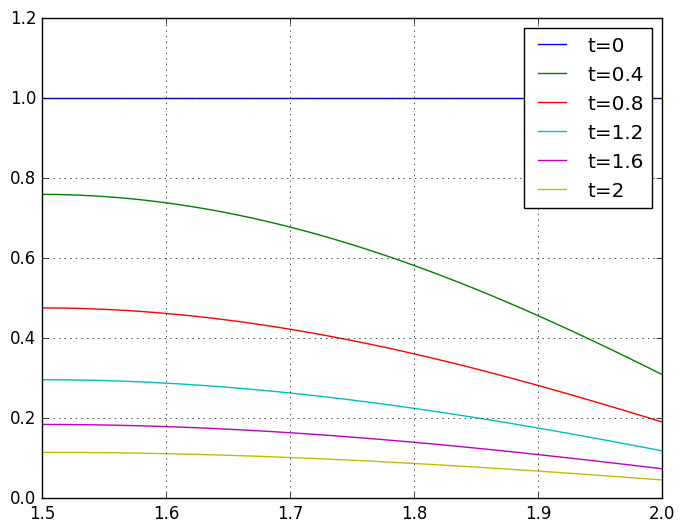

In [3]:
using PyPlot
figure()
const rs = linspace(1.5f0, 2.0f0, nr)
plot(rs, collector.frames[1], label="t=0")
plot(rs, collector.frames[2], label="t=0.4")
plot(rs, collector.frames[3], label="t=0.8")
plot(rs, collector.frames[4], label="t=1.2")
plot(rs, collector.frames[5], label="t=1.6")
plot(rs, collector.frames[6], label="t=2")
legend()
grid()
xlim([1.5, 2.0])
ylim([0, 1.2])
savefig("heat_transfer.png")